In [2]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader
# e/d

In [3]:
# print gpu
torch.cuda.set_device(1)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 1
8
(6, 1)
1.0.0


In [4]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:1')
else:
    device = "cpu"
print(device)

cuda:1


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [5]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.Normalize(),
                                               dt.ToTensor()
                                           ]))
# TODO: change the normalization parameters

In [6]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

0 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
1 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
2 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
3 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


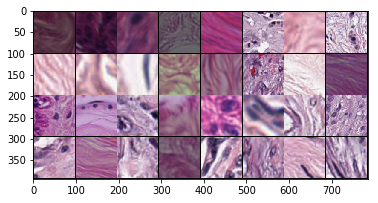

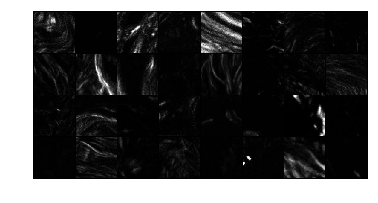

In [7]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [8]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


===> Building model


In [26]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = 1-ssim(output, targetf)
        
        p = 0.4 # 0.75->0.4 after 3 epochs
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [12]:
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.2236083298921585 lossSSIM: 0.9521285891532898
===> Epoch[1](0/25343): Loss: 0.4057
lossMSE: 0.22643481194972992 lossSSIM: 0.9551966190338135
===> Epoch[1](50/25343): Loss: 0.4086
lossMSE: 0.2193039357662201 lossSSIM: 0.9519645571708679
===> Epoch[1](100/25343): Loss: 0.4025
lossMSE: 0.2190506011247635 lossSSIM: 0.9496465921401978
===> Epoch[1](150/25343): Loss: 0.4017
lossMSE: 0.2177480310201645 lossSSIM: 0.9515767693519592
===> Epoch[1](200/25343): Loss: 0.4012
lossMSE: 0.20641782879829407 lossSSIM: 0.9386119842529297
===> Epoch[1](250/25343): Loss: 0.3895
lossMSE: 0.2131938338279724 lossSSIM: 0.9519171118736267
===> Epoch[1](300/25343): Loss: 0.3979
lossMSE: 0.2124307006597519 lossSSIM: 0.9516014456748962
===> Epoch[1](350/25343): Loss: 0.3972
lossMSE: 0.2133532166481018 lossSSIM: 0.9542365074157715
===> Epoch[1](400/25343): Loss: 0.3986
lossMSE: 0.2092287391424179 lossSSIM: 0.9485486745834351
===> Epoch[1](450/25343): Loss: 0.3941
lossMSE: 0.21059627830982208 lossSSIM: 0.

lossMSE: 0.13670922815799713 lossSSIM: 0.9393953680992126
===> Epoch[1](4250/25343): Loss: 0.3374
lossMSE: 0.13267141580581665 lossSSIM: 0.9376250505447388
===> Epoch[1](4300/25343): Loss: 0.3339
lossMSE: 0.13077574968338013 lossSSIM: 0.9242864847183228
===> Epoch[1](4350/25343): Loss: 0.3292
lossMSE: 0.13244499266147614 lossSSIM: 0.932690441608429
===> Epoch[1](4400/25343): Loss: 0.3325
lossMSE: 0.13878054916858673 lossSSIM: 0.9471837878227234
===> Epoch[1](4450/25343): Loss: 0.3409
lossMSE: 0.1291639506816864 lossSSIM: 0.9310170412063599
===> Epoch[1](4500/25343): Loss: 0.3296
lossMSE: 0.12972848117351532 lossSSIM: 0.9338974356651306
===> Epoch[1](4550/25343): Loss: 0.3308
lossMSE: 0.1363593488931656 lossSSIM: 0.948695182800293
===> Epoch[1](4600/25343): Loss: 0.3394
lossMSE: 0.12712505459785461 lossSSIM: 0.9296424388885498
===> Epoch[1](4650/25343): Loss: 0.3278
lossMSE: 0.12911218404769897 lossSSIM: 0.940505862236023
===> Epoch[1](4700/25343): Loss: 0.3320
lossMSE: 0.12383101880550

lossMSE: 0.08005616068840027 lossSSIM: 0.92084801197052
===> Epoch[1](8450/25343): Loss: 0.2903
lossMSE: 0.08186832070350647 lossSSIM: 0.927537739276886
===> Epoch[1](8500/25343): Loss: 0.2933
lossMSE: 0.07991956174373627 lossSSIM: 0.9171780943870544
===> Epoch[1](8550/25343): Loss: 0.2892
lossMSE: 0.07648035883903503 lossSSIM: 0.9098098278045654
===> Epoch[1](8600/25343): Loss: 0.2848
lossMSE: 0.0791129469871521 lossSSIM: 0.9119542837142944
===> Epoch[1](8650/25343): Loss: 0.2873
lossMSE: 0.07959481328725815 lossSSIM: 0.9217629432678223
===> Epoch[1](8700/25343): Loss: 0.2901
lossMSE: 0.0790601596236229 lossSSIM: 0.9221605658531189
===> Epoch[1](8750/25343): Loss: 0.2898
lossMSE: 0.07533227652311325 lossSSIM: 0.9094471335411072
===> Epoch[1](8800/25343): Loss: 0.2839
lossMSE: 0.07549329847097397 lossSSIM: 0.9226122498512268
===> Epoch[1](8850/25343): Loss: 0.2873
lossMSE: 0.07622328400611877 lossSSIM: 0.9108262062072754
===> Epoch[1](8900/25343): Loss: 0.2849
lossMSE: 0.07316195964813

lossMSE: 0.045732464641332626 lossSSIM: 0.8886842727661133
===> Epoch[1](12650/25343): Loss: 0.2565
lossMSE: 0.04733969271183014 lossSSIM: 0.8978765606880188
===> Epoch[1](12700/25343): Loss: 0.2600
lossMSE: 0.0423714853823185 lossSSIM: 0.8759424090385437
===> Epoch[1](12750/25343): Loss: 0.2508
lossMSE: 0.04442284628748894 lossSSIM: 0.8872299790382385
===> Epoch[1](12800/25343): Loss: 0.2551
lossMSE: 0.04625470191240311 lossSSIM: 0.8943043947219849
===> Epoch[1](12850/25343): Loss: 0.2583
lossMSE: 0.043292202055454254 lossSSIM: 0.8822076320648193
===> Epoch[1](12900/25343): Loss: 0.2530
lossMSE: 0.04374659061431885 lossSSIM: 0.8919510245323181
===> Epoch[1](12950/25343): Loss: 0.2558
lossMSE: 0.04116857051849365 lossSSIM: 0.8809995651245117
===> Epoch[1](13000/25343): Loss: 0.2511
lossMSE: 0.044537562876939774 lossSSIM: 0.9020398259162903
===> Epoch[1](13050/25343): Loss: 0.2589
lossMSE: 0.04080763831734657 lossSSIM: 0.864517092704773
===> Epoch[1](13100/25343): Loss: 0.2467
lossMSE: 

lossMSE: 0.02904576063156128 lossSSIM: 0.8771364688873291
===> Epoch[1](16800/25343): Loss: 0.2411
lossMSE: 0.025524752214550972 lossSSIM: 0.8375843167304993
===> Epoch[1](16850/25343): Loss: 0.2285
lossMSE: 0.025828015059232712 lossSSIM: 0.8410090208053589
===> Epoch[1](16900/25343): Loss: 0.2296
lossMSE: 0.02520345151424408 lossSSIM: 0.8527064919471741
===> Epoch[1](16950/25343): Loss: 0.2321
lossMSE: 0.024990541860461235 lossSSIM: 0.863754391670227
===> Epoch[1](17000/25343): Loss: 0.2347
lossMSE: 0.02840331941843033 lossSSIM: 0.839538037776947
===> Epoch[1](17050/25343): Loss: 0.2312
lossMSE: 0.03213782608509064 lossSSIM: 0.870921790599823
===> Epoch[1](17100/25343): Loss: 0.2418
lossMSE: 0.02588384598493576 lossSSIM: 0.8750680685043335
===> Epoch[1](17150/25343): Loss: 0.2382
lossMSE: 0.024070754647254944 lossSSIM: 0.8333703279495239
===> Epoch[1](17200/25343): Loss: 0.2264
lossMSE: 0.024234257638454437 lossSSIM: 0.8243420124053955
===> Epoch[1](17250/25343): Loss: 0.2243
lossMSE:

lossMSE: 0.016486169770359993 lossSSIM: 0.7503995895385742
===> Epoch[1](20950/25343): Loss: 0.2000
lossMSE: 0.016962263733148575 lossSSIM: 0.8046496510505676
===> Epoch[1](21000/25343): Loss: 0.2139
lossMSE: 0.020596930757164955 lossSSIM: 0.7519906759262085
===> Epoch[1](21050/25343): Loss: 0.2034
lossMSE: 0.01869705691933632 lossSSIM: 0.8084458112716675
===> Epoch[1](21100/25343): Loss: 0.2161
lossMSE: 0.01929977349936962 lossSSIM: 0.7935781478881836
===> Epoch[1](21150/25343): Loss: 0.2129
lossMSE: 0.016350699588656425 lossSSIM: 0.7797596454620361
===> Epoch[1](21200/25343): Loss: 0.2072
lossMSE: 0.018312828615307808 lossSSIM: 0.7775135636329651
===> Epoch[1](21250/25343): Loss: 0.2081
lossMSE: 0.016913142055273056 lossSSIM: 0.7475007176399231
===> Epoch[1](21300/25343): Loss: 0.1996
lossMSE: 0.016649482771754265 lossSSIM: 0.7253667116165161
===> Epoch[1](21350/25343): Loss: 0.1938
lossMSE: 0.01588626205921173 lossSSIM: 0.7543613910675049
===> Epoch[1](21400/25343): Loss: 0.2005
los

lossMSE: 0.014419879764318466 lossSSIM: 0.640129804611206
===> Epoch[1](25100/25343): Loss: 0.1708
lossMSE: 0.0158570297062397 lossSSIM: 0.6841727495193481
===> Epoch[1](25150/25343): Loss: 0.1829
lossMSE: 0.013970481231808662 lossSSIM: 0.6689863204956055
===> Epoch[1](25200/25343): Loss: 0.1777
lossMSE: 0.013557087630033493 lossSSIM: 0.6687588095664978
===> Epoch[1](25250/25343): Loss: 0.1774
lossMSE: 0.013608871959149837 lossSSIM: 0.6435325145721436
===> Epoch[1](25300/25343): Loss: 0.1711
===> Epoch 1 Complete: Avg. Loss: 0.2686
lossMSE: 0.014305021613836288 lossSSIM: 0.6639020442962646
===> Epoch[2](0/25343): Loss: 0.1767
lossMSE: 0.013263351283967495 lossSSIM: 0.648558497428894
===> Epoch[2](50/25343): Loss: 0.1721
lossMSE: 0.013801191933453083 lossSSIM: 0.6524527072906494
===> Epoch[2](100/25343): Loss: 0.1735
lossMSE: 0.012776627205312252 lossSSIM: 0.6505331993103027
===> Epoch[2](150/25343): Loss: 0.1722
lossMSE: 0.013698760420084 lossSSIM: 0.6200186014175415
===> Epoch[2](200/

lossMSE: 0.014354228973388672 lossSSIM: 0.5108766555786133
===> Epoch[2](3900/25343): Loss: 0.1385
lossMSE: 0.012409135699272156 lossSSIM: 0.5210134983062744
===> Epoch[2](3950/25343): Loss: 0.1396
lossMSE: 0.01248917356133461 lossSSIM: 0.5273481607437134
===> Epoch[2](4000/25343): Loss: 0.1412
lossMSE: 0.015621500089764595 lossSSIM: 0.5231768488883972
===> Epoch[2](4050/25343): Loss: 0.1425
lossMSE: 0.0138079933822155 lossSSIM: 0.5357787609100342
===> Epoch[2](4100/25343): Loss: 0.1443
lossMSE: 0.013485321775078773 lossSSIM: 0.5361129641532898
===> Epoch[2](4150/25343): Loss: 0.1441
lossMSE: 0.013523982837796211 lossSSIM: 0.5028262734413147
===> Epoch[2](4200/25343): Loss: 0.1358
lossMSE: 0.013852808624505997 lossSSIM: 0.520383358001709
===> Epoch[2](4250/25343): Loss: 0.1405
lossMSE: 0.013120346702635288 lossSSIM: 0.5126024484634399
===> Epoch[2](4300/25343): Loss: 0.1380
lossMSE: 0.01524224504828453 lossSSIM: 0.524026095867157
===> Epoch[2](4350/25343): Loss: 0.1424
lossMSE: 0.01515

lossMSE: 0.012590880505740643 lossSSIM: 0.4526217579841614
===> Epoch[2](8050/25343): Loss: 0.1226
lossMSE: 0.014447029680013657 lossSSIM: 0.4551613926887512
===> Epoch[2](8100/25343): Loss: 0.1246
lossMSE: 0.01039397157728672 lossSSIM: 0.41343873739242554
===> Epoch[2](8150/25343): Loss: 0.1112
lossMSE: 0.009992185980081558 lossSSIM: 0.4280949831008911
===> Epoch[2](8200/25343): Loss: 0.1145
lossMSE: 0.01074473187327385 lossSSIM: 0.41449427604675293
===> Epoch[2](8250/25343): Loss: 0.1117
lossMSE: 0.010604116134345531 lossSSIM: 0.4126567840576172
===> Epoch[2](8300/25343): Loss: 0.1111
lossMSE: 0.01274462416768074 lossSSIM: 0.43424683809280396
===> Epoch[2](8350/25343): Loss: 0.1181
lossMSE: 0.010416613891720772 lossSSIM: 0.4218027591705322
===> Epoch[2](8400/25343): Loss: 0.1133
lossMSE: 0.015206413343548775 lossSSIM: 0.43042469024658203
===> Epoch[2](8450/25343): Loss: 0.1190
lossMSE: 0.011771542020142078 lossSSIM: 0.4412039518356323
===> Epoch[2](8500/25343): Loss: 0.1191
lossMSE: 

lossMSE: 0.00795714557170868 lossSSIM: 0.34654831886291504
===> Epoch[2](12200/25343): Loss: 0.0926
lossMSE: 0.00708944583311677 lossSSIM: 0.3674570322036743
===> Epoch[2](12250/25343): Loss: 0.0972
lossMSE: 0.010632402263581753 lossSSIM: 0.35085779428482056
===> Epoch[2](12300/25343): Loss: 0.0957
lossMSE: 0.007187697570770979 lossSSIM: 0.353030264377594
===> Epoch[2](12350/25343): Loss: 0.0936
lossMSE: 0.007033708970993757 lossSSIM: 0.3500668406486511
===> Epoch[2](12400/25343): Loss: 0.0928
lossMSE: 0.009775987826287746 lossSSIM: 0.3845157027244568
===> Epoch[2](12450/25343): Loss: 0.1035
lossMSE: 0.006129915826022625 lossSSIM: 0.3630755543708801
===> Epoch[2](12500/25343): Loss: 0.0954
lossMSE: 0.010115615092217922 lossSSIM: 0.3563000559806824
===> Epoch[2](12550/25343): Loss: 0.0967
lossMSE: 0.010204918682575226 lossSSIM: 0.35118311643600464
===> Epoch[2](12600/25343): Loss: 0.0954
lossMSE: 0.00995582528412342 lossSSIM: 0.3541443943977356
===> Epoch[2](12650/25343): Loss: 0.0960
l

lossMSE: 0.0046984064392745495 lossSSIM: 0.3129519820213318
===> Epoch[2](16300/25343): Loss: 0.0818
lossMSE: 0.006114736199378967 lossSSIM: 0.2974774241447449
===> Epoch[2](16350/25343): Loss: 0.0790
lossMSE: 0.007160615641623735 lossSSIM: 0.2647779583930969
===> Epoch[2](16400/25343): Loss: 0.0716
lossMSE: 0.005751582328230143 lossSSIM: 0.2849356532096863
===> Epoch[2](16450/25343): Loss: 0.0755
lossMSE: 0.007176028564572334 lossSSIM: 0.2841693162918091
===> Epoch[2](16500/25343): Loss: 0.0764
lossMSE: 0.005781001411378384 lossSSIM: 0.30222511291503906
===> Epoch[2](16550/25343): Loss: 0.0799
lossMSE: 0.006231376901268959 lossSSIM: 0.2923816442489624
===> Epoch[2](16600/25343): Loss: 0.0778
lossMSE: 0.00949754286557436 lossSSIM: 0.33905982971191406
===> Epoch[2](16650/25343): Loss: 0.0919
lossMSE: 0.006078111007809639 lossSSIM: 0.3097380995750427
===> Epoch[2](16700/25343): Loss: 0.0820
lossMSE: 0.014982400462031364 lossSSIM: 0.3522590398788452
===> Epoch[2](16750/25343): Loss: 0.099

lossMSE: 0.0065245055593550205 lossSSIM: 0.28767794370651245
===> Epoch[2](20400/25343): Loss: 0.0768
lossMSE: 0.003338283859193325 lossSSIM: 0.2819522023200989
===> Epoch[2](20450/25343): Loss: 0.0730
lossMSE: 0.008276443928480148 lossSSIM: 0.2954952120780945
===> Epoch[2](20500/25343): Loss: 0.0801
lossMSE: 0.005291362758725882 lossSSIM: 0.2600456476211548
===> Epoch[2](20550/25343): Loss: 0.0690
lossMSE: 0.008410144597291946 lossSSIM: 0.27506178617477417
===> Epoch[2](20600/25343): Loss: 0.0751
lossMSE: 0.006765847560018301 lossSSIM: 0.3332369923591614
===> Epoch[2](20650/25343): Loss: 0.0884
lossMSE: 0.015568612143397331 lossSSIM: 0.2689414620399475
===> Epoch[2](20700/25343): Loss: 0.0789
lossMSE: 0.0031691426411271095 lossSSIM: 0.24463021755218506
===> Epoch[2](20750/25343): Loss: 0.0635
lossMSE: 0.003970829304307699 lossSSIM: 0.28040629625320435
===> Epoch[2](20800/25343): Loss: 0.0731
lossMSE: 0.010089335963129997 lossSSIM: 0.29253530502319336
===> Epoch[2](20850/25343): Loss: 

lossMSE: 0.0061204200610518456 lossSSIM: 0.3229966163635254
===> Epoch[2](24500/25343): Loss: 0.0853
lossMSE: 0.007229646667838097 lossSSIM: 0.29790687561035156
===> Epoch[2](24550/25343): Loss: 0.0799
lossMSE: 0.007699953392148018 lossSSIM: 0.2554793357849121
===> Epoch[2](24600/25343): Loss: 0.0696
lossMSE: 0.0048804935067892075 lossSSIM: 0.24223536252975464
===> Epoch[2](24650/25343): Loss: 0.0642
lossMSE: 0.007829205133020878 lossSSIM: 0.30843424797058105
===> Epoch[2](24700/25343): Loss: 0.0830
lossMSE: 0.003830274799838662 lossSSIM: 0.2505371570587158
===> Epoch[2](24750/25343): Loss: 0.0655
lossMSE: 0.004213789012283087 lossSSIM: 0.2496098279953003
===> Epoch[2](24800/25343): Loss: 0.0656
lossMSE: 0.005460390821099281 lossSSIM: 0.2755623459815979
===> Epoch[2](24850/25343): Loss: 0.0730
lossMSE: 0.008133122697472572 lossSSIM: 0.32362908124923706
===> Epoch[2](24900/25343): Loss: 0.0870
lossMSE: 0.0028392253443598747 lossSSIM: 0.2183976173400879
===> Epoch[2](24950/25343): Loss: 

lossMSE: 0.0023392969742417336 lossSSIM: 0.21593862771987915
===> Epoch[3](3250/25343): Loss: 0.0557
lossMSE: 0.005161569453775883 lossSSIM: 0.2529972791671753
===> Epoch[3](3300/25343): Loss: 0.0671
lossMSE: 0.008866348303854465 lossSSIM: 0.27335065603256226
===> Epoch[3](3350/25343): Loss: 0.0750
lossMSE: 0.006888045929372311 lossSSIM: 0.24857789278030396
===> Epoch[3](3400/25343): Loss: 0.0673
lossMSE: 0.0030673500150442123 lossSSIM: 0.2740274667739868
===> Epoch[3](3450/25343): Loss: 0.0708
lossMSE: 0.008755938149988651 lossSSIM: 0.33170825242996216
===> Epoch[3](3500/25343): Loss: 0.0895
lossMSE: 0.009855072945356369 lossSSIM: 0.30684977769851685
===> Epoch[3](3550/25343): Loss: 0.0841
lossMSE: 0.003923927899450064 lossSSIM: 0.21747606992721558
===> Epoch[3](3600/25343): Loss: 0.0573
lossMSE: 0.004195266868919134 lossSSIM: 0.2695479393005371
===> Epoch[3](3650/25343): Loss: 0.0705
lossMSE: 0.006024549249559641 lossSSIM: 0.3037327527999878
===> Epoch[3](3700/25343): Loss: 0.0805
lo

lossMSE: 0.005068617407232523 lossSSIM: 0.25117355585098267
===> Epoch[3](7400/25343): Loss: 0.0666
lossMSE: 0.004868669901043177 lossSSIM: 0.21382910013198853
===> Epoch[3](7450/25343): Loss: 0.0571
lossMSE: 0.0046758768148720264 lossSSIM: 0.2550024390220642
===> Epoch[3](7500/25343): Loss: 0.0673
lossMSE: 0.005163328722119331 lossSSIM: 0.24442213773727417
===> Epoch[3](7550/25343): Loss: 0.0650
lossMSE: 0.00999448075890541 lossSSIM: 0.32027703523635864
===> Epoch[3](7600/25343): Loss: 0.0876
lossMSE: 0.003845820901915431 lossSSIM: 0.22788578271865845
===> Epoch[3](7650/25343): Loss: 0.0599
lossMSE: 0.012136164121329784 lossSSIM: 0.26921987533569336
===> Epoch[3](7700/25343): Loss: 0.0764
lossMSE: 0.010255550965666771 lossSSIM: 0.26655644178390503
===> Epoch[3](7750/25343): Loss: 0.0743
lossMSE: 0.003919104114174843 lossSSIM: 0.21682512760162354
===> Epoch[3](7800/25343): Loss: 0.0571
lossMSE: 0.005730117205530405 lossSSIM: 0.24697619676589966
===> Epoch[3](7850/25343): Loss: 0.0660
l

lossMSE: 0.014173964969813824 lossSSIM: 0.3254772424697876
===> Epoch[3](11500/25343): Loss: 0.0920
lossMSE: 0.006325217429548502 lossSSIM: 0.22417813539505005
===> Epoch[3](11550/25343): Loss: 0.0608
lossMSE: 0.00804896093904972 lossSSIM: 0.3164365887641907
===> Epoch[3](11600/25343): Loss: 0.0851
lossMSE: 0.002080788603052497 lossSSIM: 0.23420816659927368
===> Epoch[3](11650/25343): Loss: 0.0601
lossMSE: 0.013634390197694302 lossSSIM: 0.32780444622039795
===> Epoch[3](11700/25343): Loss: 0.0922
lossMSE: 0.012181892991065979 lossSSIM: 0.34202396869659424
===> Epoch[3](11750/25343): Loss: 0.0946
lossMSE: 0.012414350174367428 lossSSIM: 0.3787221908569336
===> Epoch[3](11800/25343): Loss: 0.1040
lossMSE: 0.0046412330120801926 lossSSIM: 0.2722587585449219
===> Epoch[3](11850/25343): Loss: 0.0715
lossMSE: 0.008806543424725533 lossSSIM: 0.3062688112258911
===> Epoch[3](11900/25343): Loss: 0.0832
lossMSE: 0.003028284525498748 lossSSIM: 0.25874364376068115
===> Epoch[3](11950/25343): Loss: 0.

lossMSE: 0.013957221992313862 lossSSIM: 0.31833475828170776
===> Epoch[3](15600/25343): Loss: 0.0901
lossMSE: 0.009832567535340786 lossSSIM: 0.29249829053878784
===> Epoch[3](15650/25343): Loss: 0.0805
lossMSE: 0.01117341872304678 lossSSIM: 0.24621689319610596
===> Epoch[3](15700/25343): Loss: 0.0699
lossMSE: 0.002750615356490016 lossSSIM: 0.20654141902923584
===> Epoch[3](15750/25343): Loss: 0.0537
lossMSE: 0.007836231961846352 lossSSIM: 0.2871915102005005
===> Epoch[3](15800/25343): Loss: 0.0777
lossMSE: 0.009255912154912949 lossSSIM: 0.296583890914917
===> Epoch[3](15850/25343): Loss: 0.0811
lossMSE: 0.0042783417738974094 lossSSIM: 0.2905982732772827
===> Epoch[3](15900/25343): Loss: 0.0759
lossMSE: 0.004864477552473545 lossSSIM: 0.28217506408691406
===> Epoch[3](15950/25343): Loss: 0.0742
lossMSE: 0.013892938382923603 lossSSIM: 0.3346042037010193
===> Epoch[3](16000/25343): Loss: 0.0941
lossMSE: 0.008163548074662685 lossSSIM: 0.3211326003074646
===> Epoch[3](16050/25343): Loss: 0.0

KeyboardInterrupt: 

In [31]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 64
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
#             for img in input_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)
                            
#             for img in label_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)                           

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


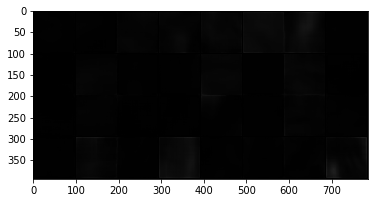

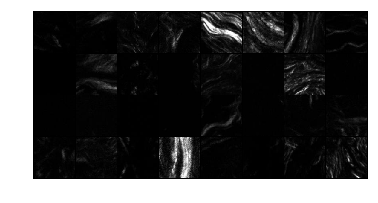

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


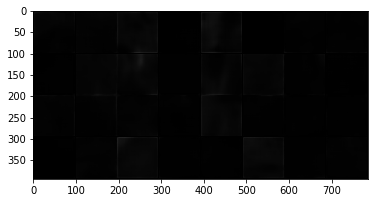

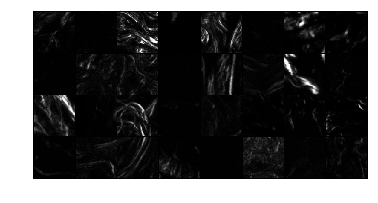

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


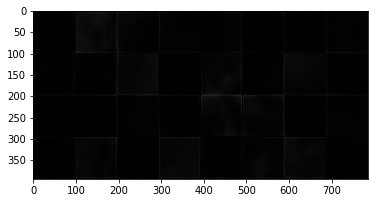

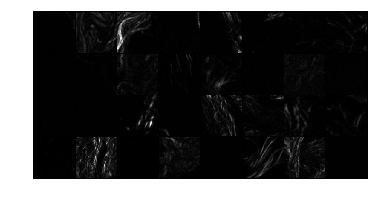

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


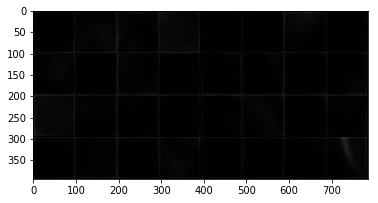

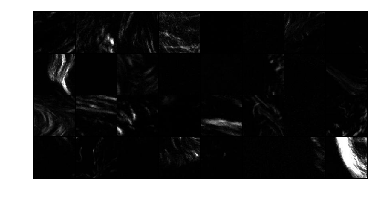

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


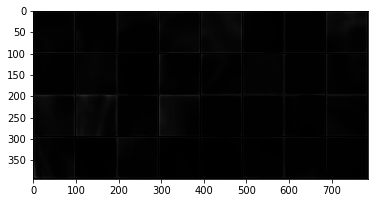

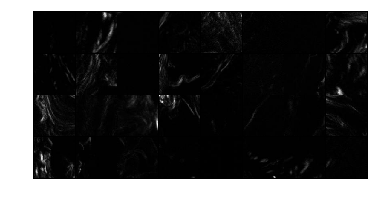

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


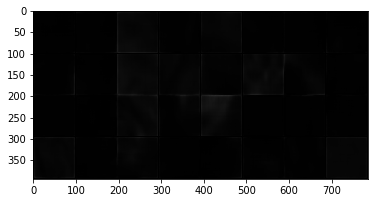

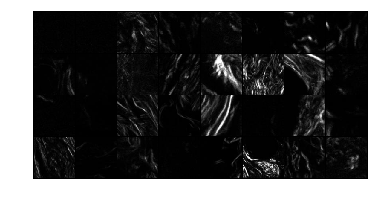

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


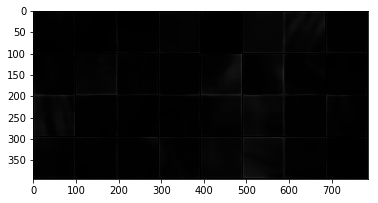

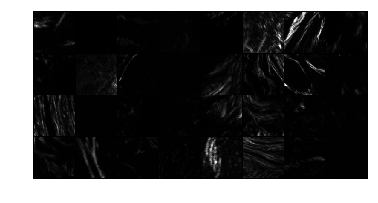

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


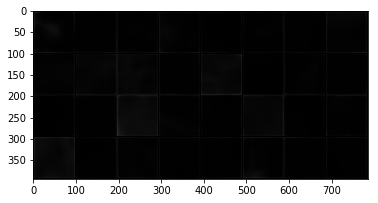

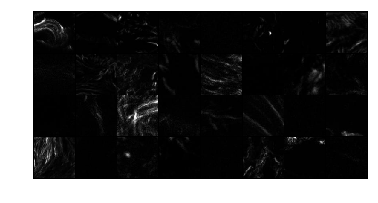

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


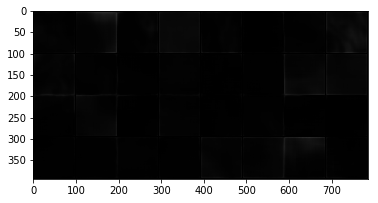

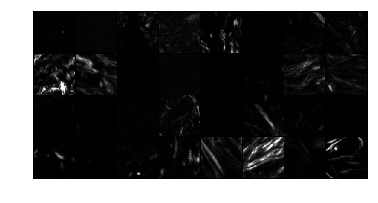

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


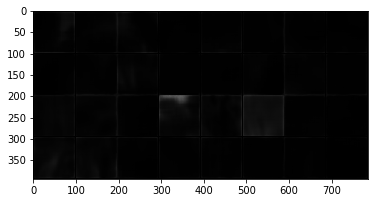

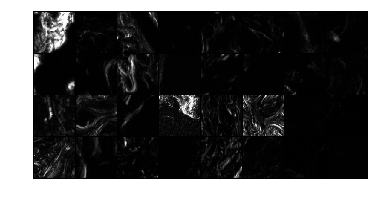

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


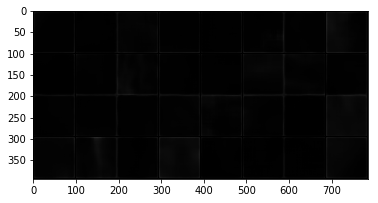

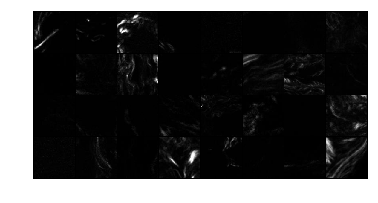

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


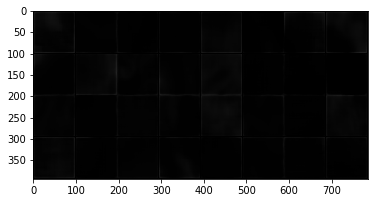

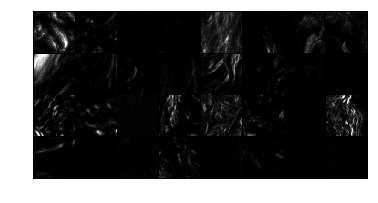

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


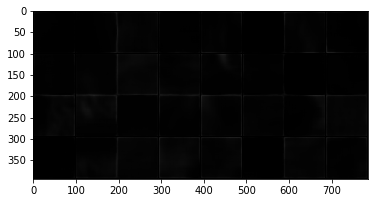

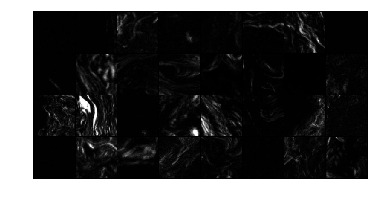

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


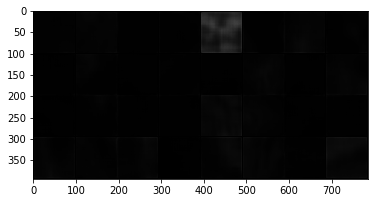

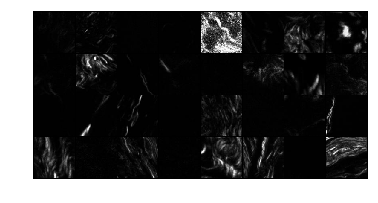

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


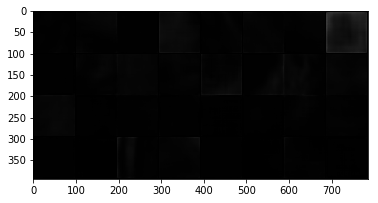

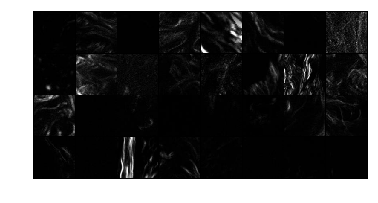

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


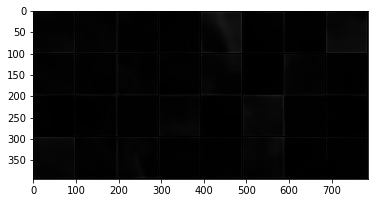

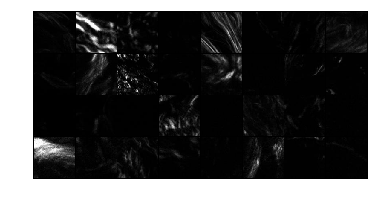

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


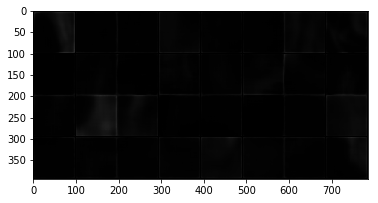

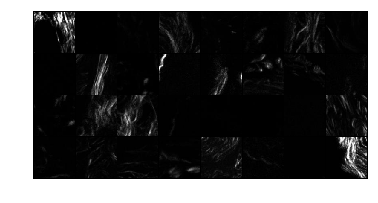

===> Avg. PSNR: nan dB


In [17]:
test()

In [18]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [19]:
for epoch in range(1, 20 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.007945235818624496 lossSSIM: 0.33534836769104004
===> Epoch[1](0/25343): Loss: 0.0898
lossMSE: 0.004066476598381996 lossSSIM: 0.24238532781600952
===> Epoch[1](50/25343): Loss: 0.0636
lossMSE: 0.004077968653291464 lossSSIM: 0.28258079290390015
===> Epoch[1](100/25343): Loss: 0.0737
lossMSE: 0.0071484679356217384 lossSSIM: 0.2803799510002136
===> Epoch[1](150/25343): Loss: 0.0755
lossMSE: 0.007389293052256107 lossSSIM: 0.24005627632141113
===> Epoch[1](200/25343): Loss: 0.0656
lossMSE: 0.0029260257724672556 lossSSIM: 0.1864500641822815
===> Epoch[1](250/25343): Loss: 0.0488
lossMSE: 0.0061559476889669895 lossSSIM: 0.2170008420944214
===> Epoch[1](300/25343): Loss: 0.0589
lossMSE: 0.015139126218855381 lossSSIM: 0.3245932459831238
===> Epoch[1](350/25343): Loss: 0.0925
lossMSE: 0.012857704423367977 lossSSIM: 0.34839117527008057
===> Epoch[1](400/25343): Loss: 0.0967
lossMSE: 0.007677312474697828 lossSSIM: 0.2671933174133301
===> Epoch[1](450/25343): Loss: 0.0726
lossMSE: 0.0036

KeyboardInterrupt: 

In [20]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [21]:
for epoch in range(1, 20 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.00451630586758256 lossSSIM: 0.2781749367713928
===> Epoch[1](0/25343): Loss: 0.0729
lossMSE: 0.012334968894720078 lossSSIM: 0.3792368173599243
===> Epoch[1](50/25343): Loss: 0.1041
lossMSE: 0.014667532406747341 lossSSIM: 0.29796355962753296
===> Epoch[1](100/25343): Loss: 0.0855
lossMSE: 0.007166301365941763 lossSSIM: 0.31486523151397705
===> Epoch[1](150/25343): Loss: 0.0841
lossMSE: 0.007320455275475979 lossSSIM: 0.27221840620040894
===> Epoch[1](200/25343): Loss: 0.0735
lossMSE: 0.0050432113930583 lossSSIM: 0.3198395371437073
===> Epoch[1](250/25343): Loss: 0.0837
lossMSE: 0.005131853744387627 lossSSIM: 0.25063556432724
===> Epoch[1](300/25343): Loss: 0.0665
lossMSE: 0.006202658172696829 lossSSIM: 0.2805887460708618
===> Epoch[1](350/25343): Loss: 0.0748
lossMSE: 0.008176160044968128 lossSSIM: 0.3171144127845764
===> Epoch[1](400/25343): Loss: 0.0854
lossMSE: 0.007162471767514944 lossSSIM: 0.337712824344635
===> Epoch[1](450/25343): Loss: 0.0898
lossMSE: 0.003518610028550

KeyboardInterrupt: 

In [27]:
# batchsize 32->128
dataloader = DataLoader(transformed_dataset, batch_size=64,
                        shuffle=True, num_workers=0)

In [28]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [29]:
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)
#   p: 0.75->0.4

lossMSE: 0.006628135219216347 lossSSIM: 0.27069270610809326
===> Epoch[1](0/12672): Loss: 0.1651
lossMSE: 0.012355188839137554 lossSSIM: 0.3338363766670227
===> Epoch[1](50/12672): Loss: 0.2052
lossMSE: 0.00647505559027195 lossSSIM: 0.28285324573516846
===> Epoch[1](100/12672): Loss: 0.1723
lossMSE: 0.004710515029728413 lossSSIM: 0.23462313413619995
===> Epoch[1](150/12672): Loss: 0.1427
lossMSE: 0.008397608995437622 lossSSIM: 0.2900369167327881
===> Epoch[1](200/12672): Loss: 0.1774
lossMSE: 0.004393624607473612 lossSSIM: 0.2725712060928345
===> Epoch[1](250/12672): Loss: 0.1653
lossMSE: 0.007149954792112112 lossSSIM: 0.29467499256134033
===> Epoch[1](300/12672): Loss: 0.1797
lossMSE: 0.012229456566274166 lossSSIM: 0.3426175117492676
===> Epoch[1](350/12672): Loss: 0.2105
lossMSE: 0.005184449255466461 lossSSIM: 0.2668694257736206
===> Epoch[1](400/12672): Loss: 0.1622
lossMSE: 0.00963525753468275 lossSSIM: 0.2704867124557495
===> Epoch[1](450/12672): Loss: 0.1661
lossMSE: 0.0083799250

lossMSE: 0.005376753397285938 lossSSIM: 0.25341904163360596
===> Epoch[1](4150/12672): Loss: 0.1542
lossMSE: 0.009690907783806324 lossSSIM: 0.28546369075775146
===> Epoch[1](4200/12672): Loss: 0.1752
lossMSE: 0.010107623413205147 lossSSIM: 0.3210441470146179
===> Epoch[1](4250/12672): Loss: 0.1967
lossMSE: 0.00803953967988491 lossSSIM: 0.307047963142395
===> Epoch[1](4300/12672): Loss: 0.1874
lossMSE: 0.006501349154859781 lossSSIM: 0.27268511056900024
===> Epoch[1](4350/12672): Loss: 0.1662
lossMSE: 0.006909474264830351 lossSSIM: 0.25392472743988037
===> Epoch[1](4400/12672): Loss: 0.1551
lossMSE: 0.013735810294747353 lossSSIM: 0.3371453285217285
===> Epoch[1](4450/12672): Loss: 0.2078
lossMSE: 0.005699453875422478 lossSSIM: 0.2794218063354492
===> Epoch[1](4500/12672): Loss: 0.1699
lossMSE: 0.00516755785793066 lossSSIM: 0.23628908395767212
===> Epoch[1](4550/12672): Loss: 0.1438
lossMSE: 0.008453824557363987 lossSSIM: 0.282524049282074
===> Epoch[1](4600/12672): Loss: 0.1729
lossMSE: 

lossMSE: 0.006682763807475567 lossSSIM: 0.276020348072052
===> Epoch[1](8300/12672): Loss: 0.1683
lossMSE: 0.005500409286469221 lossSSIM: 0.2734360694885254
===> Epoch[1](8350/12672): Loss: 0.1663
lossMSE: 0.005970293655991554 lossSSIM: 0.2777137756347656
===> Epoch[1](8400/12672): Loss: 0.1690
lossMSE: 0.007735470775514841 lossSSIM: 0.30787479877471924
===> Epoch[1](8450/12672): Loss: 0.1878
lossMSE: 0.0076001351699233055 lossSSIM: 0.3242518901824951
===> Epoch[1](8500/12672): Loss: 0.1976
lossMSE: 0.006051091011613607 lossSSIM: 0.26839810609817505
===> Epoch[1](8550/12672): Loss: 0.1635
lossMSE: 0.00839095190167427 lossSSIM: 0.31016290187835693
===> Epoch[1](8600/12672): Loss: 0.1895
lossMSE: 0.006750250700861216 lossSSIM: 0.2921399474143982
===> Epoch[1](8650/12672): Loss: 0.1780
lossMSE: 0.007421515882015228 lossSSIM: 0.2584956884384155
===> Epoch[1](8700/12672): Loss: 0.1581
lossMSE: 0.01008373312652111 lossSSIM: 0.3093125820159912
===> Epoch[1](8750/12672): Loss: 0.1896
lossMSE: 

lossMSE: 0.006680699530988932 lossSSIM: 0.25072598457336426
===> Epoch[1](12450/12672): Loss: 0.1531
lossMSE: 0.004286604002118111 lossSSIM: 0.24674981832504272
===> Epoch[1](12500/12672): Loss: 0.1498
lossMSE: 0.013188138604164124 lossSSIM: 0.2890433669090271
===> Epoch[1](12550/12672): Loss: 0.1787
lossMSE: 0.005478466395288706 lossSSIM: 0.2489345669746399
===> Epoch[1](12600/12672): Loss: 0.1516
lossMSE: 0.006410668138414621 lossSSIM: 0.28819018602371216
===> Epoch[1](12650/12672): Loss: 0.1755
===> Epoch 1 Complete: Avg. Loss: 0.1688
lossMSE: 0.003801817772909999 lossSSIM: 0.2683888077735901
===> Epoch[2](0/12672): Loss: 0.1626
lossMSE: 0.007412710227072239 lossSSIM: 0.25993460416793823
===> Epoch[2](50/12672): Loss: 0.1589
lossMSE: 0.006428766530007124 lossSSIM: 0.28978949785232544
===> Epoch[2](100/12672): Loss: 0.1764
lossMSE: 0.003932386636734009 lossSSIM: 0.2783128023147583
===> Epoch[2](150/12672): Loss: 0.1686
lossMSE: 0.0032860818319022655 lossSSIM: 0.2248653769493103
===> 

lossMSE: 0.00638301158323884 lossSSIM: 0.24537676572799683
===> Epoch[2](3900/12672): Loss: 0.1498
lossMSE: 0.003934717737138271 lossSSIM: 0.1928032636642456
===> Epoch[2](3950/12672): Loss: 0.1173
lossMSE: 0.004143037833273411 lossSSIM: 0.2681272625923157
===> Epoch[2](4000/12672): Loss: 0.1625
lossMSE: 0.0067092496901750565 lossSSIM: 0.3037295937538147
===> Epoch[2](4050/12672): Loss: 0.1849
lossMSE: 0.0067175617441535 lossSSIM: 0.28007906675338745
===> Epoch[2](4100/12672): Loss: 0.1707
lossMSE: 0.012555448338389397 lossSSIM: 0.3186224699020386
===> Epoch[2](4150/12672): Loss: 0.1962
lossMSE: 0.007055322173982859 lossSSIM: 0.2753944396972656
===> Epoch[2](4200/12672): Loss: 0.1681
lossMSE: 0.01026330515742302 lossSSIM: 0.3141849637031555
===> Epoch[2](4250/12672): Loss: 0.1926
lossMSE: 0.005260994657874107 lossSSIM: 0.25836825370788574
===> Epoch[2](4300/12672): Loss: 0.1571
lossMSE: 0.006818598601967096 lossSSIM: 0.28208988904953003
===> Epoch[2](4350/12672): Loss: 0.1720
lossMSE: 

lossMSE: 0.006897419691085815 lossSSIM: 0.27150994539260864
===> Epoch[2](8050/12672): Loss: 0.1657
lossMSE: 0.005991686601191759 lossSSIM: 0.2570751905441284
===> Epoch[2](8100/12672): Loss: 0.1566
lossMSE: 0.008172659203410149 lossSSIM: 0.3099493980407715
===> Epoch[2](8150/12672): Loss: 0.1892
lossMSE: 0.006082913838326931 lossSSIM: 0.27940088510513306
===> Epoch[2](8200/12672): Loss: 0.1701
lossMSE: 0.005268409848213196 lossSSIM: 0.26591336727142334
===> Epoch[2](8250/12672): Loss: 0.1617
lossMSE: 0.009158658795058727 lossSSIM: 0.2661721110343933
===> Epoch[2](8300/12672): Loss: 0.1634
lossMSE: 0.007208414375782013 lossSSIM: 0.2804397940635681
===> Epoch[2](8350/12672): Loss: 0.1711
lossMSE: 0.00859712716192007 lossSSIM: 0.34740668535232544
===> Epoch[2](8400/12672): Loss: 0.2119
lossMSE: 0.005298044066876173 lossSSIM: 0.26549839973449707
===> Epoch[2](8450/12672): Loss: 0.1614
lossMSE: 0.006587914191186428 lossSSIM: 0.28497713804244995
===> Epoch[2](8500/12672): Loss: 0.1736
lossM

lossMSE: 0.0031908261589705944 lossSSIM: 0.22537589073181152
===> Epoch[2](12200/12672): Loss: 0.1365
lossMSE: 0.005786538124084473 lossSSIM: 0.27005136013031006
===> Epoch[2](12250/12672): Loss: 0.1643
lossMSE: 0.01067511085420847 lossSSIM: 0.279893159866333
===> Epoch[2](12300/12672): Loss: 0.1722
lossMSE: 0.002476181136444211 lossSSIM: 0.2330356240272522
===> Epoch[2](12350/12672): Loss: 0.1408
lossMSE: 0.004960280377417803 lossSSIM: 0.22384244203567505
===> Epoch[2](12400/12672): Loss: 0.1363
lossMSE: 0.006197283510118723 lossSSIM: 0.2624874711036682
===> Epoch[2](12450/12672): Loss: 0.1600
lossMSE: 0.007688815239816904 lossSSIM: 0.2295030951499939
===> Epoch[2](12500/12672): Loss: 0.1408
lossMSE: 0.008010290563106537 lossSSIM: 0.3313465118408203
===> Epoch[2](12550/12672): Loss: 0.2020
lossMSE: 0.008590297773480415 lossSSIM: 0.2741876244544983
===> Epoch[2](12600/12672): Loss: 0.1679
lossMSE: 0.0072501907125115395 lossSSIM: 0.28657543659210205
===> Epoch[2](12650/12672): Loss: 0.1

lossMSE: 0.005134871229529381 lossSSIM: 0.290927529335022
===> Epoch[3](3650/12672): Loss: 0.1766
lossMSE: 0.003297125454992056 lossSSIM: 0.20750999450683594
===> Epoch[3](3700/12672): Loss: 0.1258
lossMSE: 0.007895071059465408 lossSSIM: 0.3045172095298767
===> Epoch[3](3750/12672): Loss: 0.1859
lossMSE: 0.013393698260188103 lossSSIM: 0.26953619718551636
===> Epoch[3](3800/12672): Loss: 0.1671
lossMSE: 0.01380874402821064 lossSSIM: 0.299862802028656
===> Epoch[3](3850/12672): Loss: 0.1854
lossMSE: 0.0058802287094295025 lossSSIM: 0.2775292992591858
===> Epoch[3](3900/12672): Loss: 0.1689
lossMSE: 0.007950772531330585 lossSSIM: 0.2965676784515381
===> Epoch[3](3950/12672): Loss: 0.1811
lossMSE: 0.008337309584021568 lossSSIM: 0.2690693736076355
===> Epoch[3](4000/12672): Loss: 0.1648
lossMSE: 0.004558035172522068 lossSSIM: 0.2612736225128174
===> Epoch[3](4050/12672): Loss: 0.1586
lossMSE: 0.005397925619035959 lossSSIM: 0.23189783096313477
===> Epoch[3](4100/12672): Loss: 0.1413
lossMSE: 

lossMSE: 0.005688897334039211 lossSSIM: 0.27067089080810547
===> Epoch[3](7800/12672): Loss: 0.1647
lossMSE: 0.007095175329595804 lossSSIM: 0.26983338594436646
===> Epoch[3](7850/12672): Loss: 0.1647
lossMSE: 0.005962764378637075 lossSSIM: 0.2800997495651245
===> Epoch[3](7900/12672): Loss: 0.1704
lossMSE: 0.005503874737769365 lossSSIM: 0.28141939640045166
===> Epoch[3](7950/12672): Loss: 0.1711
lossMSE: 0.0103460056707263 lossSSIM: 0.3035672903060913
===> Epoch[3](8000/12672): Loss: 0.1863
lossMSE: 0.0044034323655068874 lossSSIM: 0.2472100853919983
===> Epoch[3](8050/12672): Loss: 0.1501
lossMSE: 0.0060350545682013035 lossSSIM: 0.2753726840019226
===> Epoch[3](8100/12672): Loss: 0.1676
lossMSE: 0.0028522119391709566 lossSSIM: 0.20924198627471924
===> Epoch[3](8150/12672): Loss: 0.1267
lossMSE: 0.006918247323483229 lossSSIM: 0.2728169560432434
===> Epoch[3](8200/12672): Loss: 0.1665
lossMSE: 0.008471858687698841 lossSSIM: 0.29974615573883057
===> Epoch[3](8250/12672): Loss: 0.1832
loss

lossMSE: 0.008858125656843185 lossSSIM: 0.3062673807144165
===> Epoch[3](11900/12672): Loss: 0.1873
lossMSE: 0.010805443860590458 lossSSIM: 0.25948911905288696
===> Epoch[3](11950/12672): Loss: 0.1600
lossMSE: 0.006842183414846659 lossSSIM: 0.2901790142059326
===> Epoch[3](12000/12672): Loss: 0.1768
lossMSE: 0.006169072352349758 lossSSIM: 0.28758883476257324
===> Epoch[3](12050/12672): Loss: 0.1750
lossMSE: 0.0031878112349659204 lossSSIM: 0.23582333326339722
===> Epoch[3](12100/12672): Loss: 0.1428
lossMSE: 0.00924164429306984 lossSSIM: 0.2567750811576843
===> Epoch[3](12150/12672): Loss: 0.1578
lossMSE: 0.004030083306133747 lossSSIM: 0.2386925220489502
===> Epoch[3](12200/12672): Loss: 0.1448
lossMSE: 0.007386660203337669 lossSSIM: 0.30810558795928955
===> Epoch[3](12250/12672): Loss: 0.1878
lossMSE: 0.004299754276871681 lossSSIM: 0.24452632665634155
===> Epoch[3](12300/12672): Loss: 0.1484
lossMSE: 0.007506964728236198 lossSSIM: 0.30118292570114136
===> Epoch[3](12350/12672): Loss: 0

lossMSE: 0.008834480307996273 lossSSIM: 0.271431565284729
===> Epoch[4](3300/12672): Loss: 0.1664
lossMSE: 0.006256259046494961 lossSSIM: 0.28122180700302124
===> Epoch[4](3350/12672): Loss: 0.1712
lossMSE: 0.005275099538266659 lossSSIM: 0.27542734146118164
===> Epoch[4](3400/12672): Loss: 0.1674
lossMSE: 0.004949178081005812 lossSSIM: 0.23173755407333374
===> Epoch[4](3450/12672): Loss: 0.1410
lossMSE: 0.009009773842990398 lossSSIM: 0.28537243604660034
===> Epoch[4](3500/12672): Loss: 0.1748
lossMSE: 0.013743896037340164 lossSSIM: 0.2822954058647156
===> Epoch[4](3550/12672): Loss: 0.1749
lossMSE: 0.007243565283715725 lossSSIM: 0.2572062015533447
===> Epoch[4](3600/12672): Loss: 0.1572
lossMSE: 0.006563217844814062 lossSSIM: 0.28003817796707153
===> Epoch[4](3650/12672): Loss: 0.1706
lossMSE: 0.0035627451725304127 lossSSIM: 0.25720012187957764
===> Epoch[4](3700/12672): Loss: 0.1557
lossMSE: 0.006263978313654661 lossSSIM: 0.27387893199920654
===> Epoch[4](3750/12672): Loss: 0.1668
los

lossMSE: 0.005263566970825195 lossSSIM: 0.28241634368896484
===> Epoch[4](7450/12672): Loss: 0.1716
lossMSE: 0.006169140804558992 lossSSIM: 0.2514565587043762
===> Epoch[4](7500/12672): Loss: 0.1533
lossMSE: 0.00556415319442749 lossSSIM: 0.24094420671463013
===> Epoch[4](7550/12672): Loss: 0.1468
lossMSE: 0.006000027060508728 lossSSIM: 0.2986885905265808
===> Epoch[4](7600/12672): Loss: 0.1816
lossMSE: 0.005978202447295189 lossSSIM: 0.2800900340080261
===> Epoch[4](7650/12672): Loss: 0.1704
lossMSE: 0.007713275030255318 lossSSIM: 0.2999016046524048
===> Epoch[4](7700/12672): Loss: 0.1830
lossMSE: 0.006201045587658882 lossSSIM: 0.29090195894241333
===> Epoch[4](7750/12672): Loss: 0.1770
lossMSE: 0.005629975814372301 lossSSIM: 0.26489466428756714
===> Epoch[4](7800/12672): Loss: 0.1612
lossMSE: 0.008734211325645447 lossSSIM: 0.2862701416015625
===> Epoch[4](7850/12672): Loss: 0.1753
lossMSE: 0.010090034455060959 lossSSIM: 0.2526106834411621
===> Epoch[4](7900/12672): Loss: 0.1556
lossMSE

lossMSE: 0.006103786639869213 lossSSIM: 0.2649296522140503
===> Epoch[4](11600/12672): Loss: 0.1614
lossMSE: 0.009505309164524078 lossSSIM: 0.2947655916213989
===> Epoch[4](11650/12672): Loss: 0.1807
lossMSE: 0.005196309182792902 lossSSIM: 0.22774821519851685
===> Epoch[4](11700/12672): Loss: 0.1387
lossMSE: 0.007704576477408409 lossSSIM: 0.27400457859039307
===> Epoch[4](11750/12672): Loss: 0.1675
lossMSE: 0.012768437154591084 lossSSIM: 0.30121439695358276
===> Epoch[4](11800/12672): Loss: 0.1858
lossMSE: 0.006976585369557142 lossSSIM: 0.25049281120300293
===> Epoch[4](11850/12672): Loss: 0.1531
lossMSE: 0.006910071242600679 lossSSIM: 0.30584174394607544
===> Epoch[4](11900/12672): Loss: 0.1863
lossMSE: 0.010426025837659836 lossSSIM: 0.27889907360076904
===> Epoch[4](11950/12672): Loss: 0.1715
lossMSE: 0.008184329606592655 lossSSIM: 0.29495251178741455
===> Epoch[4](12000/12672): Loss: 0.1802
lossMSE: 0.0049864803440868855 lossSSIM: 0.269554078578949
===> Epoch[4](12050/12672): Loss: 

lossMSE: 0.009679194539785385 lossSSIM: 0.3034157156944275
===> Epoch[5](3000/12672): Loss: 0.1859
lossMSE: 0.006195211783051491 lossSSIM: 0.25670135021209717
===> Epoch[5](3050/12672): Loss: 0.1565
lossMSE: 0.0041084010154008865 lossSSIM: 0.2663607597351074
===> Epoch[5](3100/12672): Loss: 0.1615
lossMSE: 0.00759074417874217 lossSSIM: 0.28037601709365845
===> Epoch[5](3150/12672): Loss: 0.1713
lossMSE: 0.010664607398211956 lossSSIM: 0.2960684895515442
===> Epoch[5](3200/12672): Loss: 0.1819
lossMSE: 0.008984032087028027 lossSSIM: 0.2880418300628662
===> Epoch[5](3250/12672): Loss: 0.1764
lossMSE: 0.0038372650742530823 lossSSIM: 0.2414599061012268
===> Epoch[5](3300/12672): Loss: 0.1464
lossMSE: 0.005947452504187822 lossSSIM: 0.22768616676330566
===> Epoch[5](3350/12672): Loss: 0.1390
lossMSE: 0.010532059706747532 lossSSIM: 0.2764437198638916
===> Epoch[5](3400/12672): Loss: 0.1701
lossMSE: 0.00424715643748641 lossSSIM: 0.24459677934646606
===> Epoch[5](3450/12672): Loss: 0.1485
lossMS

lossMSE: 0.007039599120616913 lossSSIM: 0.27470964193344116
===> Epoch[5](7150/12672): Loss: 0.1676
lossMSE: 0.006992025300860405 lossSSIM: 0.2630748152732849
===> Epoch[5](7200/12672): Loss: 0.1606
lossMSE: 0.00663885148242116 lossSSIM: 0.295315682888031
===> Epoch[5](7250/12672): Loss: 0.1798
lossMSE: 0.010819493792951107 lossSSIM: 0.2958261966705322
===> Epoch[5](7300/12672): Loss: 0.1818
lossMSE: 0.005016067530959845 lossSSIM: 0.22893297672271729
===> Epoch[5](7350/12672): Loss: 0.1394
lossMSE: 0.008536781184375286 lossSSIM: 0.30365097522735596
===> Epoch[5](7400/12672): Loss: 0.1856
lossMSE: 0.006713605485856533 lossSSIM: 0.2880175709724426
===> Epoch[5](7450/12672): Loss: 0.1755
lossMSE: 0.010038710199296474 lossSSIM: 0.28988051414489746
===> Epoch[5](7500/12672): Loss: 0.1779
lossMSE: 0.005221040919423103 lossSSIM: 0.25030040740966797
===> Epoch[5](7550/12672): Loss: 0.1523
lossMSE: 0.006137816235423088 lossSSIM: 0.2630707025527954
===> Epoch[5](7600/12672): Loss: 0.1603
lossMSE

lossMSE: 0.01202927902340889 lossSSIM: 0.305392861366272
===> Epoch[5](11300/12672): Loss: 0.1880
lossMSE: 0.011187463998794556 lossSSIM: 0.29853665828704834
===> Epoch[5](11350/12672): Loss: 0.1836
lossMSE: 0.005314886104315519 lossSSIM: 0.24700170755386353
===> Epoch[5](11400/12672): Loss: 0.1503
lossMSE: 0.008351333439350128 lossSSIM: 0.2590121030807495
===> Epoch[5](11450/12672): Loss: 0.1587
lossMSE: 0.009722305461764336 lossSSIM: 0.2847059965133667
===> Epoch[5](11500/12672): Loss: 0.1747
lossMSE: 0.007987121120095253 lossSSIM: 0.28023451566696167
===> Epoch[5](11550/12672): Loss: 0.1713
lossMSE: 0.003491149516776204 lossSSIM: 0.23151206970214844
===> Epoch[5](11600/12672): Loss: 0.1403
lossMSE: 0.005752557888627052 lossSSIM: 0.2417500615119934
===> Epoch[5](11650/12672): Loss: 0.1474
lossMSE: 0.005170139484107494 lossSSIM: 0.26641517877578735
===> Epoch[5](11700/12672): Loss: 0.1619
lossMSE: 0.006629031151533127 lossSSIM: 0.26573652029037476
===> Epoch[5](11750/12672): Loss: 0.1

lossMSE: 0.007359233219176531 lossSSIM: 0.294791579246521
===> Epoch[6](2700/12672): Loss: 0.1798
lossMSE: 0.006705883890390396 lossSSIM: 0.24078816175460815
===> Epoch[6](2750/12672): Loss: 0.1472
lossMSE: 0.010039778426289558 lossSSIM: 0.29972678422927856
===> Epoch[6](2800/12672): Loss: 0.1839
lossMSE: 0.005512372124940157 lossSSIM: 0.2297729253768921
===> Epoch[6](2850/12672): Loss: 0.1401
lossMSE: 0.007366635836660862 lossSSIM: 0.24865972995758057
===> Epoch[6](2900/12672): Loss: 0.1521
lossMSE: 0.005756784696131945 lossSSIM: 0.27921009063720703
===> Epoch[6](2950/12672): Loss: 0.1698
lossMSE: 0.013727189041674137 lossSSIM: 0.3339161276817322
===> Epoch[6](3000/12672): Loss: 0.2058
lossMSE: 0.00978971365839243 lossSSIM: 0.2904456853866577
===> Epoch[6](3050/12672): Loss: 0.1782
lossMSE: 0.007046176120638847 lossSSIM: 0.27085423469543457
===> Epoch[6](3100/12672): Loss: 0.1653
lossMSE: 0.005246750079095364 lossSSIM: 0.21371203660964966
===> Epoch[6](3150/12672): Loss: 0.1303
lossMS

lossMSE: 0.005161518231034279 lossSSIM: 0.2476428747177124
===> Epoch[6](6850/12672): Loss: 0.1507
lossMSE: 0.004709308966994286 lossSSIM: 0.24457257986068726
===> Epoch[6](6900/12672): Loss: 0.1486
lossMSE: 0.007611148990690708 lossSSIM: 0.2932435870170593
===> Epoch[6](6950/12672): Loss: 0.1790
lossMSE: 0.009952417574822903 lossSSIM: 0.29691869020462036
===> Epoch[6](7000/12672): Loss: 0.1821
lossMSE: 0.009118905290961266 lossSSIM: 0.3006974458694458
===> Epoch[6](7050/12672): Loss: 0.1841
lossMSE: 0.006063844542950392 lossSSIM: 0.261615514755249
===> Epoch[6](7100/12672): Loss: 0.1594
lossMSE: 0.004923852160573006 lossSSIM: 0.23927390575408936
===> Epoch[6](7150/12672): Loss: 0.1455
lossMSE: 0.011502590961754322 lossSSIM: 0.3526243567466736
===> Epoch[6](7200/12672): Loss: 0.2162
lossMSE: 0.007370028179138899 lossSSIM: 0.270344078540802
===> Epoch[6](7250/12672): Loss: 0.1652
lossMSE: 0.0033449912443757057 lossSSIM: 0.24406123161315918
===> Epoch[6](7300/12672): Loss: 0.1478
lossMSE

lossMSE: 0.008398452773690224 lossSSIM: 0.31814175844192505
===> Epoch[6](11000/12672): Loss: 0.1942
lossMSE: 0.00537868170067668 lossSSIM: 0.25887012481689453
===> Epoch[6](11050/12672): Loss: 0.1575
lossMSE: 0.008739861659705639 lossSSIM: 0.256736159324646
===> Epoch[6](11100/12672): Loss: 0.1575
lossMSE: 0.0058868941850960255 lossSSIM: 0.2849544882774353
===> Epoch[6](11150/12672): Loss: 0.1733
lossMSE: 0.0062959520146250725 lossSSIM: 0.2745048999786377
===> Epoch[6](11200/12672): Loss: 0.1672
lossMSE: 0.009648884646594524 lossSSIM: 0.2983875274658203
===> Epoch[6](11250/12672): Loss: 0.1829
lossMSE: 0.0038213911466300488 lossSSIM: 0.288149356842041
===> Epoch[6](11300/12672): Loss: 0.1744
lossMSE: 0.008409862406551838 lossSSIM: 0.2624468207359314
===> Epoch[6](11350/12672): Loss: 0.1608
lossMSE: 0.005141176749020815 lossSSIM: 0.26184242963790894
===> Epoch[6](11400/12672): Loss: 0.1592
lossMSE: 0.006600501015782356 lossSSIM: 0.24411672353744507
===> Epoch[6](11450/12672): Loss: 0.1

lossMSE: 0.00521240197122097 lossSSIM: 0.23115932941436768
===> Epoch[7](2400/12672): Loss: 0.1408
lossMSE: 0.010100959800183773 lossSSIM: 0.2751253843307495
===> Epoch[7](2450/12672): Loss: 0.1691
lossMSE: 0.0059534702450037 lossSSIM: 0.22007781267166138
===> Epoch[7](2500/12672): Loss: 0.1344
lossMSE: 0.005041639786213636 lossSSIM: 0.27723193168640137
===> Epoch[7](2550/12672): Loss: 0.1684
lossMSE: 0.008649875409901142 lossSSIM: 0.32122474908828735
===> Epoch[7](2600/12672): Loss: 0.1962
lossMSE: 0.005162993911653757 lossSSIM: 0.26819705963134766
===> Epoch[7](2650/12672): Loss: 0.1630
lossMSE: 0.005312974564731121 lossSSIM: 0.2919182777404785
===> Epoch[7](2700/12672): Loss: 0.1773
lossMSE: 0.015069987624883652 lossSSIM: 0.3428646922111511
===> Epoch[7](2750/12672): Loss: 0.2117
lossMSE: 0.006990058347582817 lossSSIM: 0.24429208040237427
===> Epoch[7](2800/12672): Loss: 0.1494
lossMSE: 0.008816566318273544 lossSSIM: 0.3419393301010132
===> Epoch[7](2850/12672): Loss: 0.2087
lossMSE

lossMSE: 0.007897116243839264 lossSSIM: 0.2667505741119385
===> Epoch[7](6550/12672): Loss: 0.1632
lossMSE: 0.005958057940006256 lossSSIM: 0.25426608324050903
===> Epoch[7](6600/12672): Loss: 0.1549
lossMSE: 0.007764097768813372 lossSSIM: 0.2923109531402588
===> Epoch[7](6650/12672): Loss: 0.1785
lossMSE: 0.0034071318805217743 lossSSIM: 0.255675733089447
===> Epoch[7](6700/12672): Loss: 0.1548
lossMSE: 0.006775480229407549 lossSSIM: 0.32135266065597534
===> Epoch[7](6750/12672): Loss: 0.1955
lossMSE: 0.0072864932008087635 lossSSIM: 0.2604718804359436
===> Epoch[7](6800/12672): Loss: 0.1592
lossMSE: 0.00953267328441143 lossSSIM: 0.3050689101219177
===> Epoch[7](6850/12672): Loss: 0.1869
lossMSE: 0.010225438512861729 lossSSIM: 0.25237977504730225
===> Epoch[7](6900/12672): Loss: 0.1555
lossMSE: 0.006308269686996937 lossSSIM: 0.28827041387557983
===> Epoch[7](6950/12672): Loss: 0.1755
lossMSE: 0.0071625858545303345 lossSSIM: 0.2399996519088745
===> Epoch[7](7000/12672): Loss: 0.1469
lossM

lossMSE: 0.003107498399913311 lossSSIM: 0.2448062300682068
===> Epoch[7](10700/12672): Loss: 0.1481
lossMSE: 0.005732664838433266 lossSSIM: 0.2792091965675354
===> Epoch[7](10750/12672): Loss: 0.1698
lossMSE: 0.0123139014467597 lossSSIM: 0.2767787575721741
===> Epoch[7](10800/12672): Loss: 0.1710
lossMSE: 0.006720843259245157 lossSSIM: 0.2786123752593994
===> Epoch[7](10850/12672): Loss: 0.1699
lossMSE: 0.006321674212813377 lossSSIM: 0.247114360332489
===> Epoch[7](10900/12672): Loss: 0.1508
lossMSE: 0.0074747768230736256 lossSSIM: 0.27818936109542847
===> Epoch[7](10950/12672): Loss: 0.1699
lossMSE: 0.0058784885331988335 lossSSIM: 0.26932698488235474
===> Epoch[7](11000/12672): Loss: 0.1639
lossMSE: 0.01015382632613182 lossSSIM: 0.26524633169174194
===> Epoch[7](11050/12672): Loss: 0.1632
lossMSE: 0.0054924082942306995 lossSSIM: 0.24283069372177124
===> Epoch[7](11100/12672): Loss: 0.1479
lossMSE: 0.004827756900340319 lossSSIM: 0.2580571174621582
===> Epoch[7](11150/12672): Loss: 0.15

lossMSE: 0.00455882865935564 lossSSIM: 0.2398408055305481
===> Epoch[8](2100/12672): Loss: 0.1457
lossMSE: 0.008924584835767746 lossSSIM: 0.27994704246520996
===> Epoch[8](2150/12672): Loss: 0.1715
lossMSE: 0.004397324752062559 lossSSIM: 0.2390802502632141
===> Epoch[8](2200/12672): Loss: 0.1452
lossMSE: 0.008223363198339939 lossSSIM: 0.2598176598548889
===> Epoch[8](2250/12672): Loss: 0.1592
lossMSE: 0.0037679660599678755 lossSSIM: 0.2138671875
===> Epoch[8](2300/12672): Loss: 0.1298
lossMSE: 0.010951661504805088 lossSSIM: 0.28351497650146484
===> Epoch[8](2350/12672): Loss: 0.1745
lossMSE: 0.006719266064465046 lossSSIM: 0.29676634073257446
===> Epoch[8](2400/12672): Loss: 0.1807
lossMSE: 0.007832725532352924 lossSSIM: 0.27236998081207275
===> Epoch[8](2450/12672): Loss: 0.1666
lossMSE: 0.004967674612998962 lossSSIM: 0.2869073152542114
===> Epoch[8](2500/12672): Loss: 0.1741
lossMSE: 0.007635969202965498 lossSSIM: 0.30089426040649414
===> Epoch[8](2550/12672): Loss: 0.1836
lossMSE: 0.

lossMSE: 0.004321284592151642 lossSSIM: 0.2537660598754883
===> Epoch[8](6250/12672): Loss: 0.1540
lossMSE: 0.00804514903575182 lossSSIM: 0.28733348846435547
===> Epoch[8](6300/12672): Loss: 0.1756
lossMSE: 0.0045145293697714806 lossSSIM: 0.25126707553863525
===> Epoch[8](6350/12672): Loss: 0.1526
lossMSE: 0.006975499447435141 lossSSIM: 0.2950718402862549
===> Epoch[8](6400/12672): Loss: 0.1798
lossMSE: 0.009393267333507538 lossSSIM: 0.23800450563430786
===> Epoch[8](6450/12672): Loss: 0.1466
lossMSE: 0.007551148533821106 lossSSIM: 0.29088836908340454
===> Epoch[8](6500/12672): Loss: 0.1776
lossMSE: 0.007362204138189554 lossSSIM: 0.304557204246521
===> Epoch[8](6550/12672): Loss: 0.1857
lossMSE: 0.0021919547580182552 lossSSIM: 0.2049352526664734
===> Epoch[8](6600/12672): Loss: 0.1238
lossMSE: 0.007646890357136726 lossSSIM: 0.2554965615272522
===> Epoch[8](6650/12672): Loss: 0.1564
lossMSE: 0.005929064936935902 lossSSIM: 0.2594108581542969
===> Epoch[8](6700/12672): Loss: 0.1580
lossMS

lossMSE: 0.005732993129640818 lossSSIM: 0.28205442428588867
===> Epoch[8](10400/12672): Loss: 0.1715
lossMSE: 0.006931872572749853 lossSSIM: 0.2847193479537964
===> Epoch[8](10450/12672): Loss: 0.1736
lossMSE: 0.0034710047766566277 lossSSIM: 0.25369763374328613
===> Epoch[8](10500/12672): Loss: 0.1536
lossMSE: 0.011571266688406467 lossSSIM: 0.3038559556007385
===> Epoch[8](10550/12672): Loss: 0.1869
lossMSE: 0.0028455292340368032 lossSSIM: 0.22163540124893188
===> Epoch[8](10600/12672): Loss: 0.1341
lossMSE: 0.004872169811278582 lossSSIM: 0.23558521270751953
===> Epoch[8](10650/12672): Loss: 0.1433
lossMSE: 0.005474908743053675 lossSSIM: 0.2393810749053955
===> Epoch[8](10700/12672): Loss: 0.1458
lossMSE: 0.006834292318671942 lossSSIM: 0.2928234934806824
===> Epoch[8](10750/12672): Loss: 0.1784
lossMSE: 0.008834108710289001 lossSSIM: 0.27966517210006714
===> Epoch[8](10800/12672): Loss: 0.1713
lossMSE: 0.005964952986687422 lossSSIM: 0.2601832151412964
===> Epoch[8](10850/12672): Loss: 

lossMSE: 0.006262181326746941 lossSSIM: 0.28331828117370605
===> Epoch[9](1800/12672): Loss: 0.1725
lossMSE: 0.003780780592933297 lossSSIM: 0.2798759341239929
===> Epoch[9](1850/12672): Loss: 0.1694
lossMSE: 0.005388940218836069 lossSSIM: 0.25086456537246704
===> Epoch[9](1900/12672): Loss: 0.1527
lossMSE: 0.012317116372287273 lossSSIM: 0.2868801951408386
===> Epoch[9](1950/12672): Loss: 0.1771
lossMSE: 0.0048318286426365376 lossSSIM: 0.22010844945907593
===> Epoch[9](2000/12672): Loss: 0.1340
lossMSE: 0.006321204360574484 lossSSIM: 0.23969542980194092
===> Epoch[9](2050/12672): Loss: 0.1463
lossMSE: 0.006004596594721079 lossSSIM: 0.2707718014717102
===> Epoch[9](2100/12672): Loss: 0.1649
lossMSE: 0.0038561346009373665 lossSSIM: 0.24144452810287476
===> Epoch[9](2150/12672): Loss: 0.1464
lossMSE: 0.0043208240531384945 lossSSIM: 0.27932703495025635
===> Epoch[9](2200/12672): Loss: 0.1693
lossMSE: 0.006569657940417528 lossSSIM: 0.2914511561393738
===> Epoch[9](2250/12672): Loss: 0.1775
l

lossMSE: 0.004359951242804527 lossSSIM: 0.27912670373916626
===> Epoch[9](5950/12672): Loss: 0.1692
lossMSE: 0.0064603728242218494 lossSSIM: 0.26352137327194214
===> Epoch[9](6000/12672): Loss: 0.1607
lossMSE: 0.005784061271697283 lossSSIM: 0.2371659278869629
===> Epoch[9](6050/12672): Loss: 0.1446
lossMSE: 0.008729178458452225 lossSSIM: 0.2997501492500305
===> Epoch[9](6100/12672): Loss: 0.1833
lossMSE: 0.007357701659202576 lossSSIM: 0.28820669651031494
===> Epoch[9](6150/12672): Loss: 0.1759
lossMSE: 0.008215014822781086 lossSSIM: 0.27493125200271606
===> Epoch[9](6200/12672): Loss: 0.1682
lossMSE: 0.007690171245485544 lossSSIM: 0.2541469931602478
===> Epoch[9](6250/12672): Loss: 0.1556
lossMSE: 0.003275888739153743 lossSSIM: 0.2206735610961914
===> Epoch[9](6300/12672): Loss: 0.1337
lossMSE: 0.0058733075857162476 lossSSIM: 0.30121487379074097
===> Epoch[9](6350/12672): Loss: 0.1831
lossMSE: 0.007954105734825134 lossSSIM: 0.2865315079689026
===> Epoch[9](6400/12672): Loss: 0.1751
los

lossMSE: 0.005273950751870871 lossSSIM: 0.26589399576187134
===> Epoch[9](10100/12672): Loss: 0.1616
lossMSE: 0.006453006528317928 lossSSIM: 0.2547764182090759
===> Epoch[9](10150/12672): Loss: 0.1554
lossMSE: 0.006400587502866983 lossSSIM: 0.25582385063171387
===> Epoch[9](10200/12672): Loss: 0.1561
lossMSE: 0.00637871352955699 lossSSIM: 0.2588942050933838
===> Epoch[9](10250/12672): Loss: 0.1579
lossMSE: 0.006121307145804167 lossSSIM: 0.28769922256469727
===> Epoch[9](10300/12672): Loss: 0.1751
lossMSE: 0.007497074082493782 lossSSIM: 0.290749728679657
===> Epoch[9](10350/12672): Loss: 0.1774
lossMSE: 0.0037288020830601454 lossSSIM: 0.24887412786483765
===> Epoch[9](10400/12672): Loss: 0.1508
lossMSE: 0.00782769825309515 lossSSIM: 0.30015379190444946
===> Epoch[9](10450/12672): Loss: 0.1832
lossMSE: 0.005573290400207043 lossSSIM: 0.26921170949935913
===> Epoch[9](10500/12672): Loss: 0.1638
lossMSE: 0.0049031819216907024 lossSSIM: 0.25975245237350464
===> Epoch[9](10550/12672): Loss: 0

lossMSE: 0.009682077914476395 lossSSIM: 0.29266542196273804
===> Epoch[10](1500/12672): Loss: 0.1795
lossMSE: 0.0039173513650894165 lossSSIM: 0.2604803442955017
===> Epoch[10](1550/12672): Loss: 0.1579
lossMSE: 0.007757673505693674 lossSSIM: 0.26765549182891846
===> Epoch[10](1600/12672): Loss: 0.1637
lossMSE: 0.004096102900803089 lossSSIM: 0.26998400688171387
===> Epoch[10](1650/12672): Loss: 0.1636
lossMSE: 0.010446326807141304 lossSSIM: 0.26733285188674927
===> Epoch[10](1700/12672): Loss: 0.1646
lossMSE: 0.00455078249797225 lossSSIM: 0.267641544342041
===> Epoch[10](1750/12672): Loss: 0.1624
lossMSE: 0.007589458487927914 lossSSIM: 0.2391606569290161
===> Epoch[10](1800/12672): Loss: 0.1465
lossMSE: 0.006567798089236021 lossSSIM: 0.26113420724868774
===> Epoch[10](1850/12672): Loss: 0.1593
lossMSE: 0.005373945459723473 lossSSIM: 0.30534934997558594
===> Epoch[10](1900/12672): Loss: 0.1854
lossMSE: 0.00737020606175065 lossSSIM: 0.2781875729560852
===> Epoch[10](1950/12672): Loss: 0.1

lossMSE: 0.013133615255355835 lossSSIM: 0.2625380754470825
===> Epoch[10](5600/12672): Loss: 0.1628
lossMSE: 0.0039653112180531025 lossSSIM: 0.24041587114334106
===> Epoch[10](5650/12672): Loss: 0.1458
lossMSE: 0.007702547591179609 lossSSIM: 0.25455641746520996
===> Epoch[10](5700/12672): Loss: 0.1558
lossMSE: 0.01286392193287611 lossSSIM: 0.28262782096862793
===> Epoch[10](5750/12672): Loss: 0.1747
lossMSE: 0.008141198195517063 lossSSIM: 0.26395750045776367
===> Epoch[10](5800/12672): Loss: 0.1616
lossMSE: 0.007764314766973257 lossSSIM: 0.2964370846748352
===> Epoch[10](5850/12672): Loss: 0.1810
lossMSE: 0.009425816126167774 lossSSIM: 0.2994714379310608
===> Epoch[10](5900/12672): Loss: 0.1835
lossMSE: 0.0074004074558615685 lossSSIM: 0.23248249292373657
===> Epoch[10](5950/12672): Loss: 0.1424
lossMSE: 0.0051793307065963745 lossSSIM: 0.24219292402267456
===> Epoch[10](6000/12672): Loss: 0.1474
lossMSE: 0.006978179793804884 lossSSIM: 0.295971155166626
===> Epoch[10](6050/12672): Loss: 

lossMSE: 0.0072118062525987625 lossSSIM: 0.2539949417114258
===> Epoch[10](9700/12672): Loss: 0.1553
lossMSE: 0.008542612195014954 lossSSIM: 0.3139973282814026
===> Epoch[10](9750/12672): Loss: 0.1918
lossMSE: 0.013149498030543327 lossSSIM: 0.29900652170181274
===> Epoch[10](9800/12672): Loss: 0.1847
lossMSE: 0.0078050196170806885 lossSSIM: 0.29597771167755127
===> Epoch[10](9850/12672): Loss: 0.1807
lossMSE: 0.005730729550123215 lossSSIM: 0.24911147356033325
===> Epoch[10](9900/12672): Loss: 0.1518
lossMSE: 0.006550212856382132 lossSSIM: 0.2511063814163208
===> Epoch[10](9950/12672): Loss: 0.1533
lossMSE: 0.004275858867913485 lossSSIM: 0.28721731901168823
===> Epoch[10](10000/12672): Loss: 0.1740
lossMSE: 0.004409245681017637 lossSSIM: 0.26403379440307617
===> Epoch[10](10050/12672): Loss: 0.1602
lossMSE: 0.005123928189277649 lossSSIM: 0.25129109621047974
===> Epoch[10](10100/12672): Loss: 0.1528
lossMSE: 0.006435670889914036 lossSSIM: 0.2662333846092224
===> Epoch[10](10150/12672): L

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


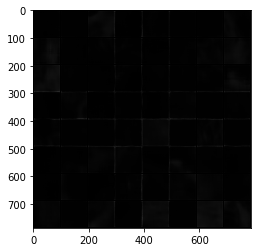

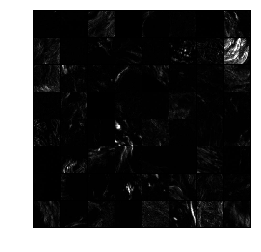

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


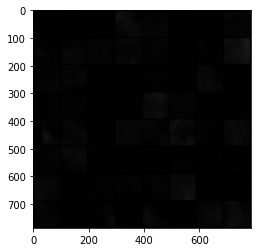

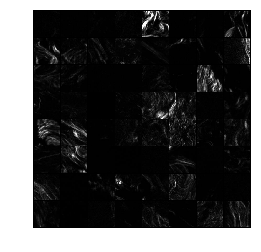

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


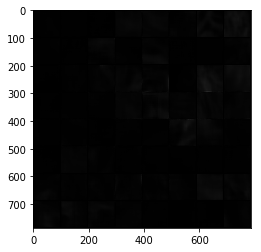

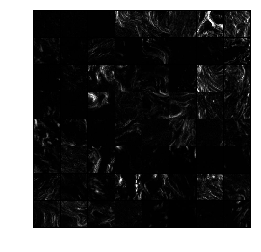

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


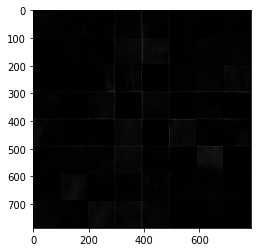

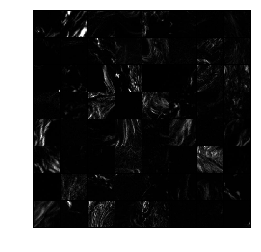

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


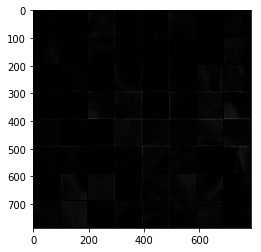

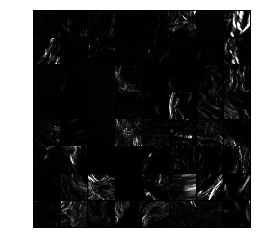

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


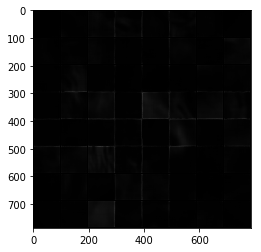

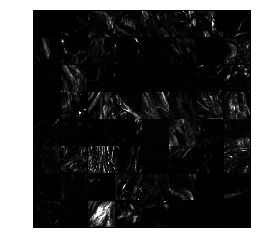

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


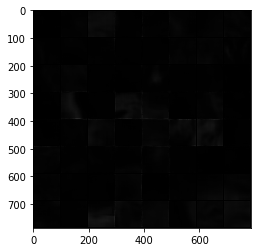

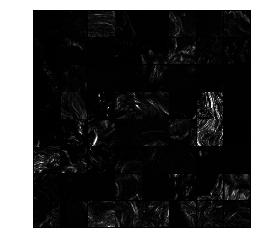

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


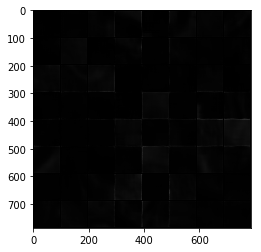

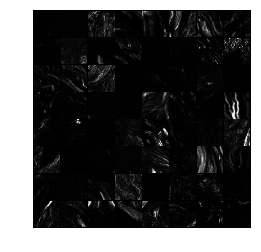

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


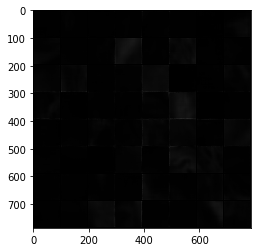

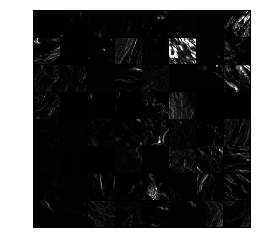

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


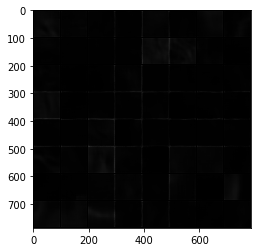

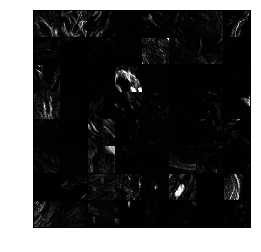

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


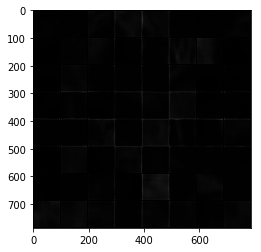

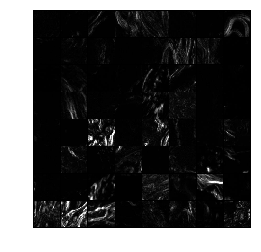

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


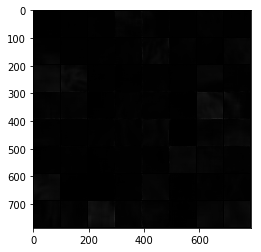

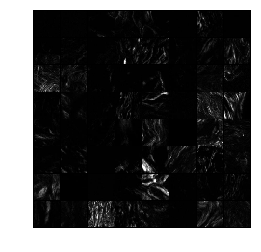

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


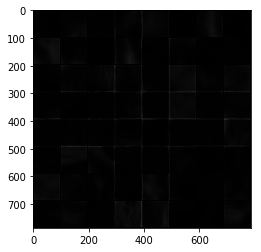

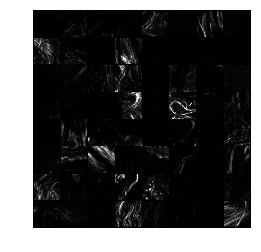

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


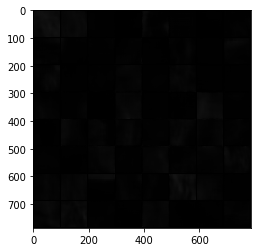

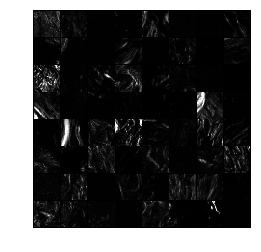

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


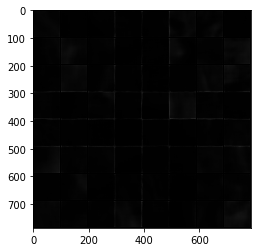

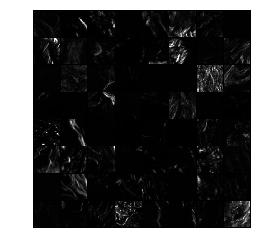

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


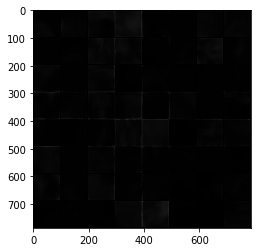

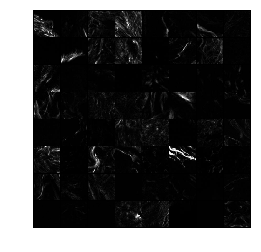

torch.Size([64, 1, 96, 96]) torch.Size([64, 96, 96])
torch.Size([64, 1, 96, 96])


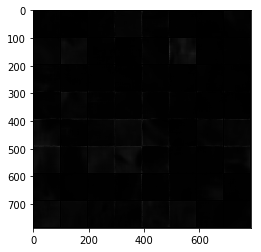

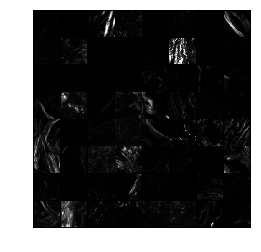

===> Avg. PSNR: nan dB


In [32]:
test()